In [1]:
!pip install pystan~=2.14

In [2]:
!pip install fbprophet --upgrade pystan



  Using cached pystan-3.5.0-py3-none-any.whl (13 kB)
  Attempting uninstall: pystan
    Found existing installation: pystan 2.19.1.1
    Uninstalling pystan-2.19.1.1:
      Successfully uninstalled pystan-2.19.1.1


In [3]:
!pip remove fbprophet
!pip install pystan==2.19.1.1
!pip install fbprophet

ERROR: unknown command "remove"
  Using cached pystan-2.19.1.1-cp39-cp39-linux_x86_64.whl
  Attempting uninstall: pystan
    Found existing installation: pystan 3.5.0
    Uninstalling pystan-3.5.0:
      Successfully uninstalled pystan-3.5.0


In [4]:
import pathlib
import pandas as pd
import numpy as np
import pandas as pd
from folium.plugins import HeatMap
from folium.plugins import FastMarkerCluster
from shapely.geometry import Polygon
from tqdm import tqdm
import folium
import h3

In [5]:
data = pd.read_pickle("./dataH3.pkl").reset_index(drop=True)
data

,hrId,name,type,ierId,level,point,state,action,cardId,isNear,...,acceptOperatorStr,lat,lon,h3-4,h3-5,h3-6,h3-7,h3-8,h3-9,h3-10
0,янв21_СлучНабор_070,Случайный набор номера,Случайный набор номера,[NULL],Обычный,[NULL],Карточка закрыта,[NULL],78cab6b3-8ded-43e1-a1df-ab49009cb500,[NULL],...,[NULL],0.000000,0.000000,84754a9ffffffff,85754e67fffffff,86754e64fffffff,87754e64dffffff,88754e6499fffff,89754e64993ffff,8a754e64992ffff
1,янв14_Молчание_488,Вызов с молчанием,Вызов с молчанием,[NULL],Обычный,"[{""lat"": 48.7458, ""lon"": 44.816}]",Карточка закрыта,[NULL],5c2b8b11-f56a-46cf-a86f-ab4201016101,[NULL],...,[NULL],48.745800,44.816002,842d48bffffffff,852d48affffffff,862d48ad7ffffff,872d48ad2ffffff,882d48ad2bfffff,892d48ad2b3ffff,8a2d48ad2b37fff
2,янв15_Молчание_418,Вызов с молчанием,Вызов с молчанием,[NULL],Обычный,"[{""lat"": 48.4808, ""lon"": 45.046}]",Карточка закрыта,[NULL],7176c1b6-de84-42d7-aa1e-ab4300ce8947,[NULL],...,[NULL],48.480801,45.046001,842d483ffffffff,852d483bfffffff,862d4839fffffff,872d4839bffffff,882d4839b9fffff,892d4839b97ffff,8a2d4839b82ffff
3,янв16_Молчание_138,Вызов с молчанием,Вызов с молчанием,[NULL],Обычный,"[{""lat"": 48.7757, ""lon"": 44.8021}]",Карточка закрыта,[NULL],43f3339b-e832-493b-8d46-ab440091c61d,[NULL],...,[NULL],48.775700,44.802101,842d48bffffffff,852d48affffffff,862d48ad7ffffff,872d48ad5ffffff,882d48ad55fffff,892d48ad557ffff,8a2d48ad554ffff
4,янв17_Молчание_145,Вызов с молчанием,Вызов с молчанием,[NULL],Обычный,"[{""lat"": 48.513, ""lon"": 44.5205}]",Карточка закрыта,[NULL],bb28b388-fbfa-42c5-8762-ab4500962c90,[NULL],...,[NULL],48.513000,44.520500,842d481ffffffff,852d4817fffffff,862d48157ffffff,872d48153ffffff,882d48153dfffff,892d48153cbffff,8a2d48153ca7fff
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2517009,EHM1_дек18_Молчание_342,Вызов с молчанием,Вызов с молчанием,,Обычный,"[{""lat"": 48.715, ""lon"": 44.5258}]",Карточка закрыта,,eaaa1dac-a35c-4732-92de-ab2700b5616f,,...,,48.715000,44.525799,842d48bffffffff,852d48bbfffffff,862d48b9fffffff,872d48b99ffffff,882d48b995fffff,892d48b9953ffff,8a2d48b99507fff
2517010,EHM1_дек17_Оказани_486,Оказание медицинской помощи,Оказание медицинской помощи,,Обычный,"[{""lat"": 48.4395, ""lon"": 44.4376}]",Карточка закрыта,,5979084d-5e62-4a1a-91c5-ab26017488fa,,...,,48.439499,44.437599,842d481ffffffff,852d4813fffffff,862d4811fffffff,872d48118ffffff,882d481183fffff,892d481182fffff,8a2d481182cffff
2517011,EHM1_дек18_Оказани_122,Оказание медицинской помощи,Оказание медицинской помощи,,Обычный,"[{""lat"": 50.1105, ""lon"": 45.4226}]",Все реагирования завершены,,f51d9497-5f4a-4870-be06-ab27009431e8,,...,,50.110500,45.422600,8410b27ffffffff,8510b273fffffff,8610b2737ffffff,8710b2730ffffff,8810b27309fffff,8910b27308bffff,8a10b2730887fff
2517012,EHM1_дек13_Молчание_032,Вызов с молчанием,Вызов с молчанием,,Обычный,"[{""lat"": 50.2237829922196, ""lon"": 43.448587056...",Карточка закрыта,,9e53b607-1fed-40d3-80db-ab22002c929f,,...,,50.223782,43.448586,8410b65ffffffff,8510b657fffffff,8610b650fffffff,8710b6509ffffff,8810b65093fffff,8910b65093bffff,8a10b6509387fff


In [6]:
data['type'].unique()

array(['Случайный набор номера', 'Вызов с молчанием', 'Детские шалости',
       'Получение справок', 'Неправильное понимание экстренной ситуации',
       'Автоматические ложные вызовы',
       'Прерывание вызова звонящим сразу после подключения',
       'Оказание медицинской помощи', 'Правонарушение', 'Вскрытие дверей',
       'ДТП', 'Неправильный набор номера (ошибочный)',
       'Застрявшие граждане в лифте', 'Психически неуравновешенные люди',
       'не задано', 'Теплоснабжение', 'Водоснабжение',
       'Наезд на пешехода', 'Труп', 'Причинение вреда здоровью',
       'Исчезновение граждан', 'Семейный конфликт', 'Помощь населению',
       'Драка', 'Кража', 'Газоснабжение',
       'Ложные вызовы вследствие сбоя в сети связи',
       'Подозрительное транспортное средство',
       'Застрявшие транспортные средства', 'Электроснабжение',
       'Угон транспортного средства', 'ДТП с пострадавшими',
       'Обрыв кабеля', 'Повреждение транспортного средства',
       'Открытые люки', 'Ножев

In [7]:
data_p=data[(data['type']=='Неправильное понимание экстренной ситуации')]
#data_p=data[(data['type']=='Неправильное понимание экстренной ситуации')&(data['h3-8']=='882d48b983fffff')]

In [8]:
data_p.iloc[0]

hrId                                   EHM1_янв01_НепрПоним_050
name                 Неправильное понимание экстренной ситуации
type                 Неправильное понимание экстренной ситуации
ierId                                                    [NULL]
level                                                   Обычный
point                         [{"lat": 50.1197, "lon": 45.423}]
state                                          Карточка закрыта
action                                                   [NULL]
cardId                     cb324777-cc7a-4980-b164-ab3500fa8ba0
isNear                                                   [NULL]
region                                                Волгоград
ierType                                                  [NULL]
cityCode                                                 [NULL]
regionId                                                      1
cityFiasId                                               [NULL]
isBlocking                              

In [9]:
df=data_p['name'].groupby(data_p['timeIsoStr'].str[:10]).count().reset_index()
df.columns=['ds', 'y']
df['ds']=pd.to_datetime(df['ds'])

df

,ds,y
0,2019-01-01,98
1,2019-01-02,48
2,2019-01-03,12
3,2019-01-04,46
4,2019-01-05,63
...,...,...
948,2021-12-27,8
949,2021-12-28,60
950,2021-12-29,55
951,2021-12-30,33


In [10]:
#импортируем библиотеку
from fbprophet import Prophet

m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -47.9201


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      92       1483.13    0.00021149       84.6841   2.695e-06       0.001      162  LS failed, Hessian reset 
      99       1483.14   3.30374e-05       69.4412       1.036       0.208      172   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     170       1483.16   4.01894e-08       71.9687      0.2906           1      269   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [11]:
future = m.make_future_dataframe(periods=90)
forecast = m.predict(future)

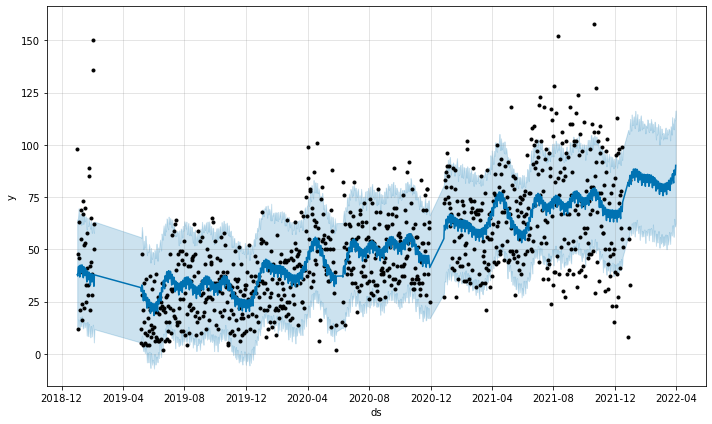

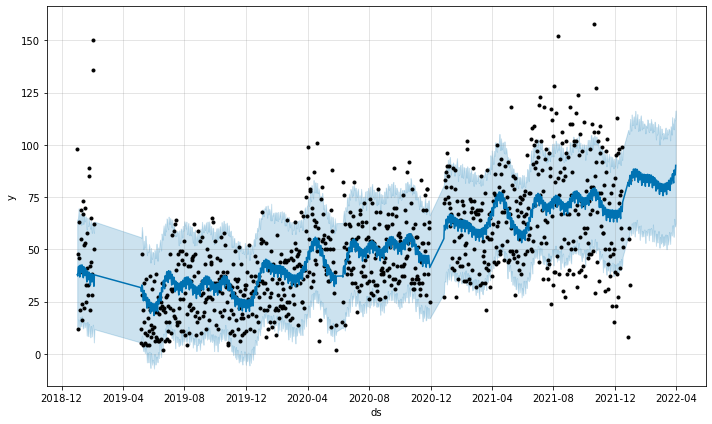

In [12]:
m.plot(forecast)


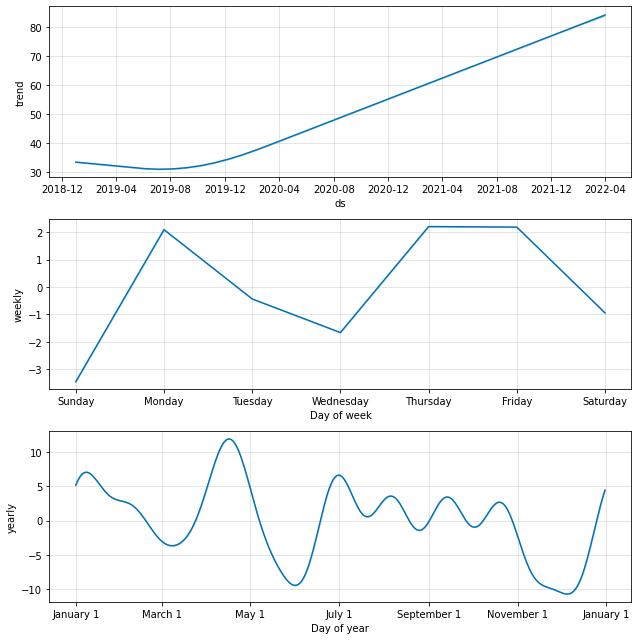

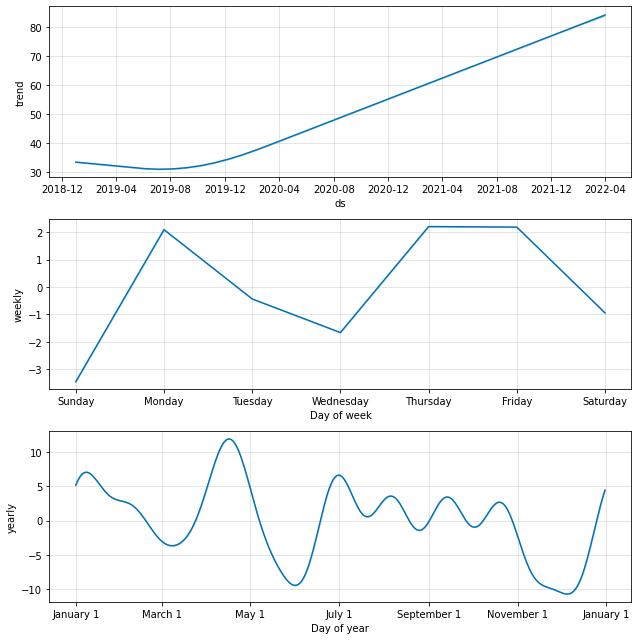

In [13]:
m.plot_components(forecast)
